## Import necessary libraries

In [34]:
import mediapipe as mp
import cv2 as cv
import math
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
import keyboard
import time
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# TRIAL WITH IMAGES

### Specify variables

In [9]:
size = 200
directory = "./collected_images"
new_directory = "./mod_collected_images"
# letters = ['N', 'I', 'C']

letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
numbers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

abecedario = dict(zip(letters, numbers))


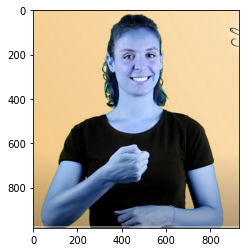

In [193]:
# example image 
image = cv2.imread("./collected_images/A/Captura de pantalla 2022-03-31 a las 16.17.08.png")
cv2.imshow('image',image)
plt.imshow(image)

### FUNCTIONS FOR IMAGE PROCESSING

In [194]:
### NOT NEEDED

# FUNCTION: MOD_IMAGES
def mod_images_folder(mod_images_folder_name):

    ''' function which creates folder to store copy of images for processing'''
    new_dir = mod_images_folder_name
    os.makedirs(new_dir)
    print("Directory created")  

    return(new_dir)

In [195]:
# FUNCTION: MOD_IMAGES
def copy_images(old_dir, new_dir):

    ''' function which creates a copy of all images and saves them in new folder'''
    source_dir = old_dir
    destination_dir = new_dir
    shutil.copytree(source_dir, destination_dir)

    return('copied correctly')

In [196]:
# copy_images(directory, new_directory)

all modifications can now be made on copy of images

In [235]:
# FUNCTION: RESCALE_IMAGES
def rescale_images(directory, letters, size = 64): 

    ''' Function that runs through every image in every folder in directory 
        and resizes it to the desired size
        default size = 64'''

    # --> input: folder_name (str) + letters (list) + size
    #                                             --> output: saves images as originally named in desired folder

    for letter in letters: 
        for filename in os.listdir(directory+'/'+letter):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                file = directory+'/'+letter+'/'+filename
                im = cv.imread(file)
                im = cv.resize(im, (size,size))
                cv.imwrite(file, im)
        continue

    return()

In [198]:
# FUNCTION: FLIP_SAVE_IMAGES
def flip_images(directory, letters):

    '''Function that runs through every image in every folder in specified directory, 
       flips the image horizontally (to create the ilusion of signing with opposite hand, increasing sample size) 
       and saves it in a file called the same but with 'izq' infront of the filename'''

    # --> input: folder_name (str) + letters (list)
    #                                             --> output: saves images as originally named rescaled to desired size

    for letter in letters: 
        try:
            for filename in os.listdir(directory+'/'+letter+'/'):
                im = cv.imread(directory+'/'+letter+'/'+filename)
                im_rev = cv.flip(im, 1)
                name = directory+'/'+letter+'/'+'izq'+filename
                print(name)
                try:
                    cv.imwrite(name, im_rev)
                except:
                    continue
        except:
            continue

    return()

In [199]:
# FUNCTION: CREATE_DICT_IMAGES
def create_dict_images(directory, letters):

  ''' function that runs through every folder in the specified directory 
      saves the image and the name of the parent folder (letter) 
      creating dictionary with the images and their corresponding label
      for classification'''

  # input --> directory where images are found (string), letters ()

  images = {}

  for letter in letters: 
      full_directory = directory+'/'+letter
      for filename in os.listdir(full_directory):
          full_address = full_directory+'/'+filename
          # Read image and convert the BGR image to RGB
          # save filename and image in dictionary 
          images.update({filename: cv2.imread(full_address, cv2.COLOR_BGR2RGB)})

  return(images)


In [200]:
# FUNCTION: PRINT_IMAGES

def print_images(image):

    ''' function that prints images'''

    plt.figure()
    plt.imshow(image)

In [244]:
# rescale_images(new_directory, letters, size)
# flip_images(new_directory, letters)
# create_dict_images(new_directory, letters)# 

()

In [202]:
# FUNCTION: GRAYSCALE_IMAGES
def grayscale_images(directory, letters): 

    '''Function that runs through every image in every folder in directory and converts into grayscale'''

    # --> input: directory (str) + letters (list)
    #                                         --> output: saves images 


    # list of letters in dictionary 
    for letter in letters: 
        try:
            for filename in os.listdir(directory+'/'+letter+'/'):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    file = directory+'/'+letter+'/'+filename
                    image = cv.imread(directory+'/'+letter+'/'+filename)
                    im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    im.save(file)
        except:
            continue

    return()

Manually divide folders into train/test/validation

In [10]:
train_dir = new_directory+'/train'
test_dir = new_directory+'/train'

In [204]:
# FUNCTION: SAVE_INTO_ARRAY
def save_into_array(directory, abecedario):
    
    '''Function that runs through every image in every folder in directory saves into an array to use for ML models'''

    # --> input: directory (str) + abecedario (list)
    #                                             --> output: array
    
    data_array = []
    for letter, number in abecedario.items(): 
        try:
            for filename in os.listdir(directory+'/'+letter+'/'):
                file = directory+'/'+letter+'/'+filename
                im = cv.imread(file)
                im_array = np.asarray(im)
                data_array.append(im_array)
                data_array['y'] = number
        except:
            continue

    return(data_array)

In [4]:
# FUNCTION: SAVE_ARRAY_GRAYSCALE
def save_array_target(directory, abecedario, size):
    
    '''Function that runs through every image in every folder in directory saves into an array to use for ML models'''

    # --> input: directory (str) + abecedario (list)
    #                                             --> output: array (grayscale images)

    size_cols = (size*size)
    data_array = np.zeros((1,size_cols))
    target_array = []
    # for letter in abecedario: 

    for letter, number in abecedario.items(): 
        try:
            for filename in os.listdir(directory+'/'+letter+'/'):
                file = directory+'/'+letter+'/'+filename
                if filename == '.DS_Store':
                    continue
                else:
                    im = cv.imread(file, cv.IMREAD_GRAYSCALE)
                    flat_im= im.reshape((1,size_cols)) 
                    data_array = np.concatenate((data_array,flat_im), axis=0)
                    target_array.append(number)
        except Exception as e: 
            print(e)
            # print(im.type)
            print(file)
            # plt.imshow(im)

    return data_array, target_array

In [229]:
for filename in os.listdir(train_dir+'/'+'A'+'/'):
    print (filename)

A-EC12.jpg
A-EC13.jpg
.DS_Store
Captura de pantalla 2022-04-03 a las 20.59.56.png
izqCaptura de pantalla 2022-03-31 a las 16.18.13.png
izqCaptura de pantalla 2022-04-03 a las 20.59.56.png
izqCaptura de pantalla 2022-03-31 a las 16.20.27.png
izqA-EC14.jpg
izqA-EC13.jpg
izqA-EC12.jpg


In [11]:
train_array, target_train = save_array_target(train_dir, abecedario, size)

In [12]:
test_array, target_test = save_array_target(test_dir, abecedario, size)

In [13]:
target_df_test = pd.DataFrame(target_test)
test_df = pd.DataFrame(test_array)

In [14]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,129.0,133.0,136.0,136.0,133.0,131.0,132.0,134.0,133.0,132.0,...,95.0,96.0,102.0,110.0,122.0,133.0,138.0,138.0,137.0,135.0
2,107.0,106.0,105.0,105.0,105.0,106.0,107.0,108.0,103.0,104.0,...,106.0,107.0,87.0,109.0,132.0,145.0,131.0,101.0,100.0,128.0
3,207.0,207.0,207.0,208.0,208.0,207.0,207.0,208.0,208.0,208.0,...,13.0,16.0,15.0,13.0,16.0,19.0,19.0,19.0,20.0,18.0
4,203.0,203.0,203.0,203.0,203.0,203.0,203.0,203.0,203.0,203.0,...,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,...,8.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0
203,129.0,125.0,139.0,140.0,139.0,140.0,143.0,144.0,146.0,145.0,...,11.0,9.0,10.0,10.0,11.0,55.0,62.0,59.0,59.0,58.0
204,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,...,144.0,144.0,144.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0
205,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,...,131.0,131.0,131.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0


In [15]:
target_df_train = pd.DataFrame(target_train)
train_df = pd.DataFrame(train_array)

## REGRESSION TRIAL 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [16]:
train_df.drop([0], axis = 0, inplace=True)
test_df.drop([0], axis = 0, inplace=True)

In [18]:
full_dataFrame = pd.concat([train_df, test_df])
full_target_for_dataFrame = pd.concat([target_df_train, target_df_test])

In [19]:
full_dataFrame = full_dataFrame.dropna()

In [20]:
X = full_dataFrame
y = full_target_for_dataFrame

In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
1,129.0,133.0,136.0,136.0,133.0,131.0,132.0,134.0,133.0,132.0,...,95.0,96.0,102.0,110.0,122.0,133.0,138.0,138.0,137.0,135.0
2,107.0,106.0,105.0,105.0,105.0,106.0,107.0,108.0,103.0,104.0,...,106.0,107.0,87.0,109.0,132.0,145.0,131.0,101.0,100.0,128.0
3,207.0,207.0,207.0,208.0,208.0,207.0,207.0,208.0,208.0,208.0,...,13.0,16.0,15.0,13.0,16.0,19.0,19.0,19.0,20.0,18.0
4,203.0,203.0,203.0,203.0,203.0,203.0,203.0,203.0,203.0,203.0,...,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0
5,196.0,195.0,200.0,185.0,196.0,198.0,199.0,200.0,200.0,201.0,...,12.0,13.0,13.0,13.0,13.0,13.0,12.0,11.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,...,8.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0
203,129.0,125.0,139.0,140.0,139.0,140.0,143.0,144.0,146.0,145.0,...,11.0,9.0,10.0,10.0,11.0,55.0,62.0,59.0,59.0,58.0
204,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,...,144.0,144.0,144.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0
205,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,...,131.0,131.0,131.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [23]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

/Users/cash/Documents/data_science/alumno/Entregas/MachineLearningNic/videoSignDetection/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [266]:
prediction = logisticRegr.predict(x_test)

In [268]:
score = accuracy_score(y_test, prediction)
print(score * 100, "%")

78.3132530120482 %


In [270]:
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

78.3132530120482 %


In [24]:
# import pickle

# with open('image_LSE_class_LR', 'wb') as archivo_salida:
#      pickle.dump(logisticRegr, archivo_salida)

# NEURAL NETWORKS

##### using keras module that creates class name based on folder names

In [26]:
train_df = ImageDataGenerator(rescale=1/255)
test_df = ImageDataGenerator(rescale=1/255)
validation_df = ImageDataGenerator(rescale=1/255)

In [28]:
image_size = 200

In [29]:
train_dataset = train_df.flow_from_directory('./mod_collected_images/train', target_size=(image_size,image_size), batch_size=10,  class_mode = 'categorical')
test_dataset = test_df.flow_from_directory('./mod_collected_images/test', target_size=(image_size,image_size), batch_size=10,  class_mode = 'categorical')

Found 208 images belonging to 27 classes.
Found 74 images belonging to 27 classes.


In [30]:
train_dataset.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'CH': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'J': 10,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26}

### model 

In [31]:
num_classes = len(train_dataset.class_indices)

In [32]:
# model 
# list with definition of layers

first_model = tf.keras.models.Sequential([ 
              # SIMPLE CONVOLUTION LAYER
              tf.keras.layers.Conv2D(16,(3,3),  # with how many filters we want inside layer, size of filters
                                     activation = 'relu',  # activation function
                                     input_shape= (image_size,image_size, 3)), # size of input pictures
              # MAX POOLING LAYER
              tf.keras.layers.MaxPool2D(2,2), 
              tf.keras.layers.Conv2D(32,(3,3),  # with how many filters we want inside layer, size of filters
                                     activation = 'relu',  # activation function
                                     input_shape= (image_size,image_size, 3)), # size of input pictures
              tf.keras.layers.MaxPool2D(2,2), 
              tf.keras.layers.Conv2D(64,(3,3),  # with how many filters we want inside layer, size of filters
                                     activation = 'relu',  # activation function
                                     input_shape= (image_size,image_size, 3)), # size of input pictures
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512, activation='relu'),
              tf.keras.layers.Dense(num_classes, activation='softmax')              
              ])

2022-04-16 18:17:34.927053: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-16 18:17:34.927359: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
first_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])

In [35]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [36]:
model_fit = first_model.fit(train_dataset, steps_per_epoch=15, epochs=100, validation_data = test_dataset)

2022-04-16 18:18:42.564633: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
15/15 [==============================] - 8s 453ms/step - loss: 23.2312 - accuracy: 0.0436 - val_loss: 0.1707 - val_accuracy: 0.0405
Epoch 2/100
15/15 [==============================] - 7s 474ms/step - loss: 0.1907 - accuracy: 0.0218 - val_loss: 0.1797 - val_accuracy: 0.0405
Epoch 3/100
15/15 [==============================] - 7s 483ms/step - loss: 0.1833 - accuracy: 0.0178 - val_loss: 0.1640 - val_accuracy: 0.0405
Epoch 4/100
15/15 [==============================] - 7s 487ms/step - loss: 0.1745 - accuracy: 0.1228 - val_loss: 0.1620 - val_accuracy: 0.0405
Epoch 5/100
15/15 [==============================] - 8s 530ms/step - loss: 0.1730 - accuracy: 0.0314 - val_loss: 0.1719 - val_accuracy: 0.0405
Epoch 6/100
15/15 [==============================] - 8s 541ms/step - loss: 0.1745 - accuracy: 0.0351 - val_loss: 0.1689 - val_accuracy: 0.0135
Epoch 7/100
15/15 [==============================] - 8s 542ms/step - loss: 0.1742 - accuracy: 0.0097 - val_loss: 0.1771 - val_accuracy: 0.040

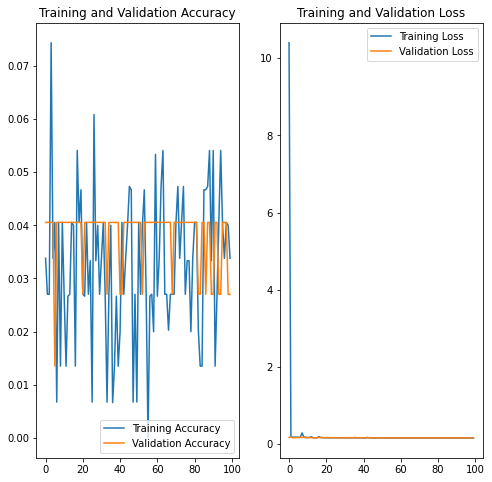

In [38]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### function to test images 

In [ ]:
def test_model_images(directory, letters, abecedario): 

    # Function that runs through every image in every folder in test directory and prints image with prediction

    # --> input: folder_name (str) + alphabet (dict) 
    #                                             --> output: image + prediction

    # list of letters in dictionary 
    for letter in letters: 
        try:
            for filename in os.listdir(directory+'/'+letter):
                img= image.load_img(directory+'/'+letter+'/'+filename, target_size=(200,200))
                plt.imshow(img)
                plt.show
                X = image.img_to_array(img)
                X = np.expand_dims(X, axis=0)
                images = np.vstack([X])
                predictions = first_model.predict(images)
                print(predictions)
                print(predictions.shape)
                pred = list(abecedario.keys())[list(abecedario.values()).index(predictions)]
                print('The letter was {}'.format(pred))
        except:
            continue

    return()